# Dataset
## UCF101 Action Recognition Dataset
https://www.crcv.ucf.edu/data/UCF101.php
##Short video clips of 101 movement classes like PushUps, Squats, TennsiSwing, etc.

In [ ]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101.rar --no-check-certificate

--2020-10-25 20:28:36--  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6932971618 (6.5G) [application/rar]
Saving to: ‘UCF101.rar’

UCF101.rar          100%[===================>]   6.46G  71.9MB/s    in 97s     

2020-10-25 20:30:13 (68.5 MB/s) - ‘UCF101.rar’ saved [6932971618/6932971618]



Unrar all videos

In [ ]:
!unrar e UCF101.rar

# Download txt file containing movement labels and corresponding IDs

In [ ]:
!mkdir labels
import os
os.chdir('labels')

mkdir: cannot create directory ‘labels’: File exists


In [ ]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip --no-check-certificate

--2020-10-25 21:09:37--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘UCF101TrainTestSplits-RecognitionTask.zip’

UCF101TrainTestSpli 100%[===================>] 111.27K  --.-KB/s    in 0.07s   

2020-10-25 21:09:37 (1.46 MB/s) - ‘UCF101TrainTestSplits-RecognitionTask.zip’ saved [113943/113943]



In [ ]:
!unzip UCF101TrainTestSplits-RecognitionTask.zip

Archive:  UCF101TrainTestSplits-RecognitionTask.zip
   creating: ucfTrainTestlist/
  inflating: ucfTrainTestlist/classInd.txt  
  inflating: ucfTrainTestlist/testlist01.txt  
  inflating: ucfTrainTestlist/testlist02.txt  
  inflating: ucfTrainTestlist/testlist03.txt  
  inflating: ucfTrainTestlist/trainlist01.txt  
  inflating: ucfTrainTestlist/trainlist02.txt  
  inflating: ucfTrainTestlist/trainlist03.txt  


# Read frames from example video file into list and convert from cv2's BGR format to RGB

In [ ]:
import cv2

In [ ]:
video = cv2.VideoCapture('v_PushUps_g01_c01.avi')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
images = []
while True:
  ret, image = video.read()
  if not ret:
    break
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image)

# Example image of man doing pushups in a gym

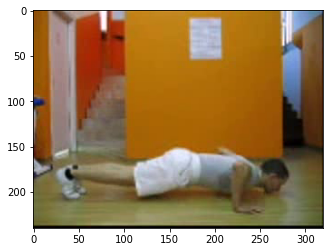

In [ ]:
plt.imshow(images[10])

# Finds the absolute difference between two frames using openCV. It subtracts images[3] from images[4].

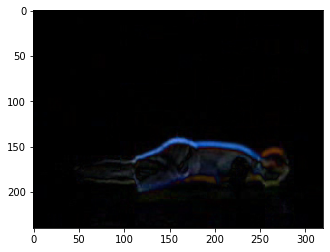

In [ ]:
diff = cv2.absdiff(images[3], images[4])
plt.imshow(diff)

In [ ]:
import numpy as np

In [ ]:
hsv = np.zeros_like(images[13])
gray1 = cv2.cvtColor(images[13], cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(images[14], cv2.COLOR_RGB2GRAY)

# cv2.calcOpticalFlowFarneback() function generates the optical flow between two images. For that the images need to be converted to grayscale e.g. using cv2.cvtColor()

In [ ]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Then the image is shown in matplotlib.

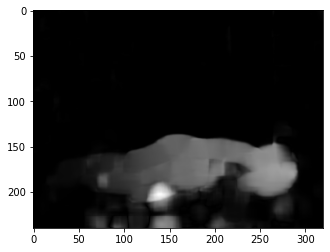

In [ ]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(bgr)

# Read movement class indeces into a dictionary with name as the key and index as value 

In [ ]:
os.chdir('ucfTrainTestlist')

In [ ]:
classfile = open('classInd.txt', 'r')

classes = {}
for line in classfile:
  line = line.strip().split(' ')
  classes[line[1]] = int(line[0])

classfile.close()

print(classes['PushUps'])

72


# Read training video file names
## We only store the file names because each video woudln't fit into memory at once. They will be read individually at training time.

In [ ]:
train_fnames = []

In [ ]:
def read_train_filenames(fname):
  f = open(fname, 'r')
  for line in f:
    line = line.strip().split(' ')
    train_fnames.append(line[0].split('/')[1])
  f.close()

In [ ]:
for fname in ['trainlist01.txt', 'trainlist02.txt', 'trainlist03.txt']:
  read_train_filenames(fname)

In [ ]:
print(len(train_fnames))

28747


# Read file names for test video files

In [ ]:
test_fnames = []

In [ ]:
def read_test_filenames(fname):
  f = open(fname, 'r')
  for line in f:
    line = line.strip().split(' ')
    test_fnames.append(line[0].split('/')[1])
  f.close()

In [ ]:
for fname in ['testlist01.txt', 'testlist02.txt', 'testlist03.txt']:
  read_test_filenames(fname)

In [ ]:
print(len(test_fnames))

11213
